In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from scipy import stats

In [83]:
df = pd.read_csv('/Users/jaeko/JaeMachineLearningProject/MachineLearningProject/train.csv')

In [84]:
df

,Id,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageType,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,PoolArea,Fence,SaleType,SaleCondition,SalePrice
0,1,65.0,8450,Reg,2Story,7,5,2003,2003,196.0,...,Attchd,2,TA,0,61,0,NaN,WD,Normal,208500
1,2,80.0,9600,Reg,1Story,6,8,1976,1976,0.0,...,Attchd,2,TA,298,0,0,NaN,WD,Normal,181500
2,3,68.0,11250,IR1,2Story,7,5,2001,2002,162.0,...,Attchd,2,TA,0,42,0,NaN,WD,Normal,223500
3,4,60.0,9550,IR1,2Story,7,5,1915,1970,0.0,...,Detchd,3,TA,0,35,0,NaN,WD,Abnorml,140000
4,5,84.0,14260,IR1,2Story,8,5,2000,2000,350.0,...,Attchd,3,TA,192,84,0,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,Reg,2Story,6,5,1999,2000,0.0,...,Attchd,2,TA,0,40,0,NaN,WD,Normal,175000
1456,1457,85.0,13175,Reg,1Story,6,6,1978,1988,119.0,...,Attchd,2,TA,349,0,0,MnPrv,WD,Normal,210000
1457,1458,66.0,9042,Reg,2Story,7,9,1941,2006,0.0,...,Attchd,1,TA,0,60,0,GdPrv,WD,Normal,266500
1458,1459,68.0,9717,Reg,1Story,5,6,1950,1996,0.0,...,Attchd,1,TA,366,0,0,NaN,WD,Normal,142125


In [85]:
print(df.dtypes.to_string())

Id                 int64
LotFrontage      float64
LotArea            int64
LotShape          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
TotalBsmtSF        int64
CentralAir        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
Functional        object
Fireplaces         int64
GarageType        object
GarageCars         int64
GarageQual        object
WoodDeckSF         int64
OpenPorchSF        int64
PoolArea           int64
Fence             object
SaleType          object
SaleCondition     object
SalePrice          int64


In [86]:
df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'Fence', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [87]:
for c in df.columns[1:]:
    if c in ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
             'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 
             'WoodDeckSF', 'GrLivArea', 'OpenPorchSF', 
             'PoolArea', 'SalePrice']:
        # skip the above columns, because they are not categorical
        continue
    print('\nCOLUMN: "{}"\n=============================='.format(c))
    print(df[c].value_counts(dropna=False).to_string())


COLUMN: "LotShape"
Reg    925
IR1    484
IR2     41
IR3     10

COLUMN: "HouseStyle"
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8

COLUMN: "OverallQual"
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2

COLUMN: "OverallCond"
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1

COLUMN: "CentralAir"
Y    1365
N      95

COLUMN: "BsmtFullBath"
0    856
1    588
2     15
3      1

COLUMN: "FullBath"
2    768
1    650
3     33
0      9

COLUMN: "HalfBath"
0    913
1    535
2     12

COLUMN: "BedroomAbvGr"
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1

COLUMN: "KitchenAbvGr"
1    1392
2      65
3       2
0       1

COLUMN: "KitchenQual"
TA    735
Gd    586
Ex    100
Fa     39

COLUMN: "Functional"
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1

COLUMN: "Fireplaces"
0    690
1  

In [88]:
%matplotlib inline

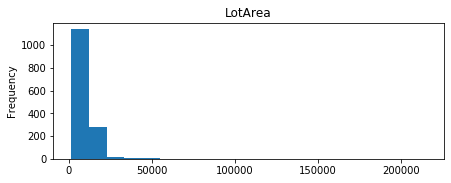

In [89]:
# print a histogram graph of the LotArea
df['LotArea'].plot.hist(
    title='LotArea',  # title of graph
    bins=20,          # do 20 bins
    figsize=(7,2.5),  # graph size: 7 inches wide by 2.5 inches high
)


COLUMN: "LotFrontage"
MAX:  313.0
MIN:  21.0
NaN:  259


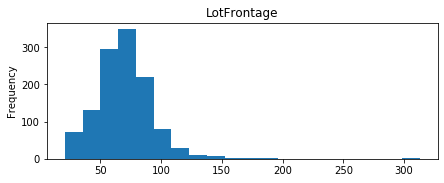




COLUMN: "LotArea"
MAX:  215245
MIN:  1300
NaN:  0


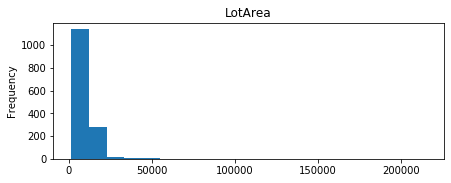




COLUMN: "YearBuilt"
MAX:  2010
MIN:  1872
NaN:  0


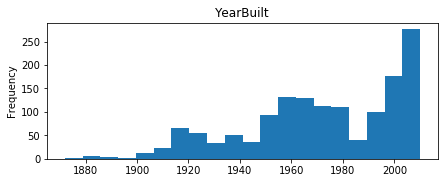




COLUMN: "1stFlrSF"
MAX:  4692
MIN:  334
NaN:  0


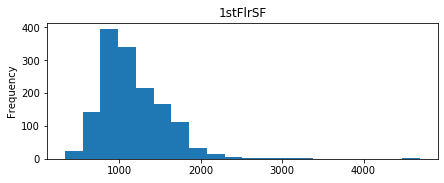




COLUMN: "2ndFlrSF"
MAX:  2065
MIN:  0
NaN:  0


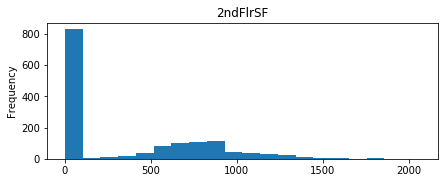




COLUMN: "YearRemodAdd"
MAX:  2010
MIN:  1950
NaN:  0


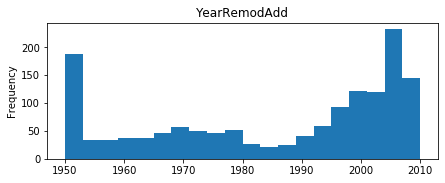




COLUMN: "MasVnrArea"
MAX:  1600.0
MIN:  0.0
NaN:  8


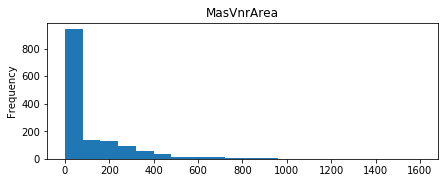




COLUMN: "TotalBsmtSF"
MAX:  6110
MIN:  0
NaN:  0


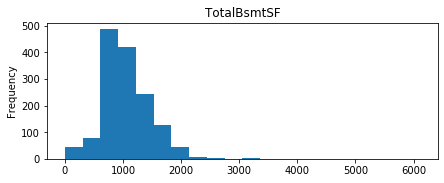




COLUMN: "WoodDeckSF"
MAX:  857
MIN:  0
NaN:  0


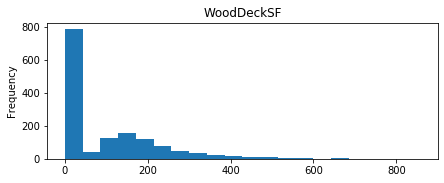




COLUMN: "GrLivArea"
MAX:  5642
MIN:  334
NaN:  0


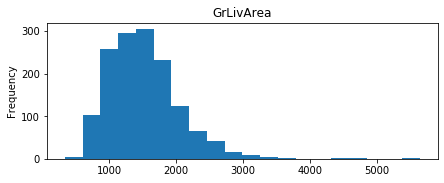




COLUMN: "OpenPorchSF"
MAX:  547
MIN:  0
NaN:  0


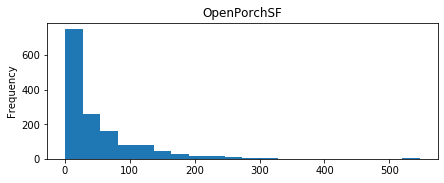




COLUMN: "PoolArea"
MAX:  738
MIN:  0
NaN:  0


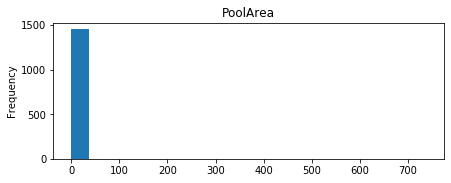




COLUMN: "SalePrice"
MAX:  755000
MIN:  34900
NaN:  0


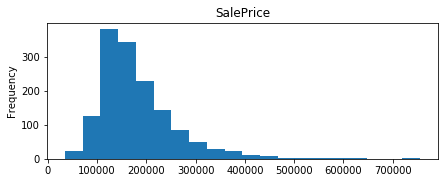

In [90]:
# Print information about the non-categorical columns
# for each of those columns, print out the max and min
# values, and the number of NaN. Also print a histogram
import matplotlib.pyplot as plt
columns_with_numbers = [
    'LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
    'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'WoodDeckSF', 
    'GrLivArea', 'OpenPorchSF', 'PoolArea', 'SalePrice']
for c in columns_with_numbers:
    print('\nCOLUMN: "{}"\n=============================='.format(c))
    print('MAX:  {}'.format(df[c].max()))
    print('MIN:  {}'.format(df[c].min()))
    print('NaN:  {}'.format(df[c].isna().sum()))
    df[c].plot.hist(title=c, bins=20, figsize=(7,2.5))
    plt.show()
    print('\n')

In [91]:
df.isna().sum()

Id                  0
LotFrontage       259
LotArea             0
LotShape            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
TotalBsmtSF         0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
Functional          0
Fireplaces          0
GarageType         81
GarageCars          0
GarageQual         81
WoodDeckSF          0
OpenPorchSF         0
PoolArea            0
Fence            1179
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [92]:
(df.count() / 1460) *100

Id               100.000000
LotFrontage       82.260274
LotArea          100.000000
LotShape         100.000000
HouseStyle       100.000000
OverallQual      100.000000
OverallCond      100.000000
YearBuilt        100.000000
YearRemodAdd     100.000000
MasVnrArea        99.452055
TotalBsmtSF      100.000000
CentralAir       100.000000
1stFlrSF         100.000000
2ndFlrSF         100.000000
GrLivArea        100.000000
BsmtFullBath     100.000000
FullBath         100.000000
HalfBath         100.000000
BedroomAbvGr     100.000000
KitchenAbvGr     100.000000
KitchenQual      100.000000
Functional       100.000000
Fireplaces       100.000000
GarageType        94.452055
GarageCars       100.000000
GarageQual        94.452055
WoodDeckSF       100.000000
OpenPorchSF      100.000000
PoolArea         100.000000
Fence             19.246575
SaleType         100.000000
SaleCondition    100.000000
SalePrice        100.000000
dtype: float64

In [93]:
df_categorical = df.select_dtypes(include=['object']).copy()

In [94]:
df_categorical

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,Reg,2Story,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
1,Reg,1Story,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
2,IR1,2Story,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
3,IR1,2Story,Y,Gd,Typ,Detchd,TA,NaN,WD,Abnorml
4,IR1,2Story,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,Reg,2Story,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
1456,Reg,1Story,Y,TA,Min1,Attchd,TA,MnPrv,WD,Normal
1457,Reg,2Story,Y,Gd,Typ,Attchd,TA,GdPrv,WD,Normal
1458,Reg,1Story,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal


In [95]:
# example of creating a mapping from categories (as strings) to 
# numbers automatically, without respect to any order or precidence 
# of the categories for one column
labels = df_categorical['HouseStyle'].astype('category').cat.categories.tolist()
#mapping = {'2Story':1, '1Story':2, }  # if did this by hand
mapping = {'HouseStyle' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [96]:
labels

['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']

In [97]:
from pprint import pprint
pprint(mapping)

{'HouseStyle': {'1.5Fin': 1,
                '1.5Unf': 2,
                '1Story': 3,
                '2.5Fin': 4,
                '2.5Unf': 5,
                '2Story': 6,
                'SFoyer': 7,
                'SLvl': 8}}


In [98]:
mapping['HouseStyle']['2Story']

6

In [99]:
df_c_num = df_categorical.copy()

In [100]:
df_c_num.replace(mapping, inplace=True)
df_c_num

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,Reg,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
1,Reg,3,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
2,IR1,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
3,IR1,6,Y,Gd,Typ,Detchd,TA,NaN,WD,Abnorml
4,IR1,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,Reg,6,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
1456,Reg,3,Y,TA,Min1,Attchd,TA,MnPrv,WD,Normal
1457,Reg,6,Y,Gd,Typ,Attchd,TA,GdPrv,WD,Normal
1458,Reg,3,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal


In [101]:
df_c_num['HouseStyle'].dtype

dtype('int64')

In [102]:
df_categorical['HouseStyle'].dtype

dtype('O')

In [103]:
# define as category, instead of int64
df_c_num['HouseStyle'] = df_c_num['HouseStyle'].astype('category')
df_c_num['HouseStyle'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8], ordered=False)

In [104]:
df_c_num

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,Reg,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
1,Reg,3,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
2,IR1,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
3,IR1,6,Y,Gd,Typ,Detchd,TA,NaN,WD,Abnorml
4,IR1,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,Reg,6,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
1456,Reg,3,Y,TA,Min1,Attchd,TA,MnPrv,WD,Normal
1457,Reg,6,Y,Gd,Typ,Attchd,TA,GdPrv,WD,Normal
1458,Reg,3,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal


In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # label encoder
df_c_num['LotShape'] = le.fit_transform(df_c_num['LotShape'])
df_c_num

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,3,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
1,3,3,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
2,0,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
3,0,6,Y,Gd,Typ,Detchd,TA,NaN,WD,Abnorml
4,0,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,3,6,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
1456,3,3,Y,TA,Min1,Attchd,TA,MnPrv,WD,Normal
1457,3,6,Y,Gd,Typ,Attchd,TA,GdPrv,WD,Normal
1458,3,3,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal


In [106]:
le.inverse_transform([0,1,2,3])  # reverse numbers back to category strings

array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)

In [107]:
le.classes_

array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)

In [108]:
df_c_num = df_categorical.copy()
all_le = {}
for c in df_c_num.columns:
    print(c)
    df_c_num[c] = df_c_num[c].fillna('NaN')
    df_c_num[c] = df_c_num[c].astype('category')
    le = LabelEncoder()  # label encoder
    all_le[c] = le
    df_c_num[c] = le.fit_transform(df_c_num[c])

LotShape
HouseStyle
CentralAir
KitchenQual
Functional
GarageType
GarageQual
Fence
SaleType
SaleCondition


In [109]:
df_c_num

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,3,5,1,2,6,1,5,4,8,4
1,3,2,1,3,6,1,5,4,8,4
2,0,5,1,2,6,1,5,4,8,4
3,0,5,1,2,6,5,5,4,8,0
4,0,5,1,2,6,1,5,4,8,4
...,...,...,...,...,...,...,...,...,...,...
1455,3,5,1,3,6,1,5,4,8,4
1456,3,2,1,3,2,1,5,2,8,4
1457,3,5,1,2,6,1,5,0,8,4
1458,3,2,1,2,6,1,5,4,8,4


In [110]:
all_le['GarageType'].classes_

array(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd',
       'NaN'], dtype=object)

In [111]:
all_le['GarageType'].inverse_transform([0,1,2,3,4,5,6])

array(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd',
       'NaN'], dtype=object)

In [112]:
le = all_le['GarageType']

{}

In [113]:
df_final = pd.concat( [df.drop(columns=df_c_num.columns), df_c_num], axis=1 )
df_final

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,1,65.0,8450,7,5,2003,2003,196.0,856,856,...,3,5,1,2,6,1,5,4,8,4
1,2,80.0,9600,6,8,1976,1976,0.0,1262,1262,...,3,2,1,3,6,1,5,4,8,4
2,3,68.0,11250,7,5,2001,2002,162.0,920,920,...,0,5,1,2,6,1,5,4,8,4
3,4,60.0,9550,7,5,1915,1970,0.0,756,961,...,0,5,1,2,6,5,5,4,8,0
4,5,84.0,14260,8,5,2000,2000,350.0,1145,1145,...,0,5,1,2,6,1,5,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,1999,2000,0.0,953,953,...,3,5,1,3,6,1,5,4,8,4
1456,1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,...,3,2,1,3,2,1,5,2,8,4
1457,1458,66.0,9042,7,9,1941,2006,0.0,1152,1188,...,3,5,1,2,6,1,5,0,8,4
1458,1459,68.0,9717,5,6,1950,1996,0.0,1078,1078,...,3,2,1,2,6,1,5,4,8,4


In [114]:
df_final.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'SalePrice', 'LotShape',
       'HouseStyle', 'CentralAir', 'KitchenQual', 'Functional', 'GarageType',
       'GarageQual', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [115]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [116]:
X = df_final.drop(["SalePrice","Id"],1)   #Feature Matrix
y = df_final["SalePrice"]          #Target Variable

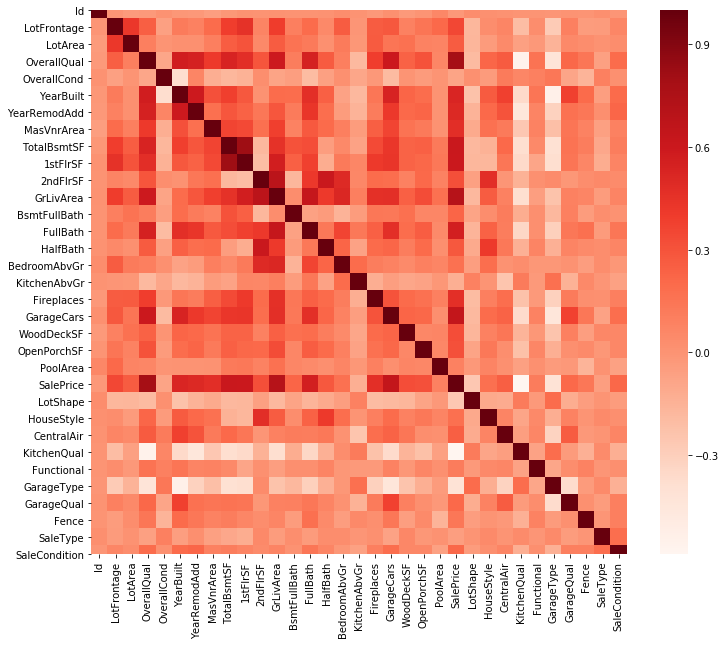

In [117]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_final.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [118]:
#Correlation with output variable
cor_target = abs(cor["SalePrice"])
cor_target

Id               0.021917
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond      0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
GrLivArea        0.708624
BsmtFullBath     0.227122
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
Fireplaces       0.466929
GarageCars       0.640409
WoodDeckSF       0.324413
OpenPorchSF      0.315856
PoolArea         0.092404
SalePrice        1.000000
LotShape         0.255580
HouseStyle       0.180163
CentralAir       0.251328
KitchenQual      0.589189
Functional       0.115328
GarageType       0.415283
GarageQual       0.205963
Fence            0.140640
SaleType         0.054911
SaleCondition    0.213092
Name: SalePrice, dtype: float64

In [119]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
GarageCars      0.640409
SalePrice       1.000000
KitchenQual     0.589189
Name: SalePrice, dtype: float64

In [120]:
df_c_num.columns

Index(['LotShape', 'HouseStyle', 'CentralAir', 'KitchenQual', 'Functional',
       'GarageType', 'GarageQual', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [121]:
all_le['HouseStyle'].classes_

array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
       'SFoyer', 'SLvl'], dtype=object)

In [122]:
all_le['KitchenQual'].classes_

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

In [123]:
relevant_features.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice', 'KitchenQual'],
      dtype='object')

In [125]:
X = df_final[relevant_features.index]  #Feature Matrix
X.drop(['SalePrice'], inplace=True, axis=1)
y = df_final["SalePrice"]          #Target Variable
#Fitting sm.OLS model
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              4404.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):                        0.00
Time:                        23:38:43   Log-Likelihood:                         -17434.
No. Observations:                1460   AIC:                                  3.489e+04
Df Residuals:                    1451   BIC:                                  3.493e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   1.888e+04   1153.583     16.369      0.000    1.66e+04    2.11e+04
YearBuilt      141.6365     44.991      3.148      0.002      53.382     229.891
YearRemodAdd  -153.0156     43.879     -3.487      0.001    -239.090     -66.942
TotalBsmtSF     21.3830      4.178      5.118      0.000      13.188      29.578
1stFlrSF         9.9945      4.819      2.074      0.038       0.542      19.447
GrLivArea       44.3991      2.922     15.193      0.000      38.667      50.131
FullBath      -739.5814   2460.032     -0.301      0.764   -5565.181    4086.018
GarageCars    1.671e+04   1740.589      9.601      0.000    1.33e+04    2.01e+04
KitchenQual  -1.692e+04   1418.612    -11.925      0.000   -1.97e+04   -1.41e+04
==============================================================================
Omnibus:                      491.707   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47399.391
Skew:                          -0.566   Prob(JB):                         0.00
Kurtosis:                      30.891   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""